In [1]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
def ApoxFunk(x):
    return x**2

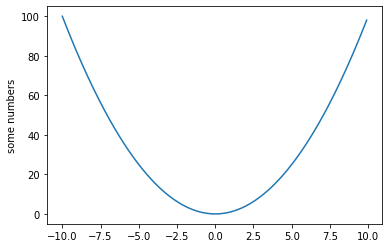

In [3]:
pcenter = 0
prange = 10
step = 0.1 # короче в масив от -9 до 9 с шагом 0.1
period = np.arange(pcenter-prange, pcenter+prange, step)
#plt.plot(period,ApoxFunk(period))
plt.plot(period,ApoxFunk(period))
plt.ylabel('some numbers')
plt.show();


In [4]:
class PartyNN(object):
    
    def __init__(self, learning_rate=0.0005, input_nodes =1, hiden_nodes=25, output_nodes=1):
        input_nodes +=1 # добавляет еще один входной нейрон  
        self.weights_0_1 = np.random.normal(0.0, 2 ** -0.5, (hiden_nodes, input_nodes))# 15 на сколько входов будет сток и весов
        self.weights_1_2 = np.random.normal(0.0, 1, (output_nodes, hiden_nodes)) #кол скрытых на выходной
        self.sigmoid_mapper = np.vectorize(self.sigmoid)  # 1/1=exp**(-x)
        self.learning_rate = np.array([learning_rate])
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        inputs = np.concatenate((inputs,[1]))# Добавляет в конец масива еще один элемент 1         
        inputs_1 = np.dot(self.weights_0_1, inputs) # скаляр умнож  3 нейрона по два веса на входа из 3 значен
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        #inputs_2 = np.dot(self.weights_1_2, outputs_1)
        #outputs_2 = self.sigmoid_mapper(inputs_2)
        outputs_2 = np.dot(self.weights_1_2, outputs_1)
              
        return outputs_2
    
    def train(self, inputs, expected_predict):  
        inputs = np.concatenate((inputs,[1]))   
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        #inputs_2 = np.dot(self.weights_1_2, outputs_1)
        #outputs_2 = self.sigmoid_mapper(inputs_2)
        outputs_2 = np.dot(self.weights_1_2, outputs_1)
             
        actual_predict = outputs_2[0]             # 'это вход значения с бинарного ответа получившегося
        
        error_layer_2 = np.array([actual_predict - expected_predict])
        gradient_layer_2 = 1 # actual_predict * (1 - actual_predict)
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2  
        self.weights_1_2 -= (np.dot(weights_delta_layer_2, outputs_1.reshape(1, len(outputs_1)))) * self.learning_rate
        
        error_layer_1 = weights_delta_layer_2 * self.weights_1_2
        gradient_layer_1 = outputs_1 * (1 - outputs_1)
        weights_delta_layer_1 = error_layer_1 * gradient_layer_1
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T  * self.learning_rate

In [5]:
lr = 0.0005
myNN = PartyNN( learning_rate=0.001, input_nodes =1, hiden_nodes=25, output_nodes=1)
#myNN = PartyNN( learning_rate=0.1, input_nodes =1, hiden_nodes=5, output_nodes=1)


In [6]:
set_count =100
#rand_set = (np.random.random(set_count))*2*prange-prange+pcenter  # сложный вариант    
#rand_set = np.random.uniform(-9, 9, set_count)   # массив    
   
    

In [7]:

def Train():
    #rand_set =(np.random.random(set_count))*2*prange-prange+pcenter  
    rand_set = np.random.uniform(-9, 9, set_count)   # массив   
    for x in range(0,set_count-1):
        myNN.train([rand_set[x]],ApoxFunk(rand_set[x]))
    

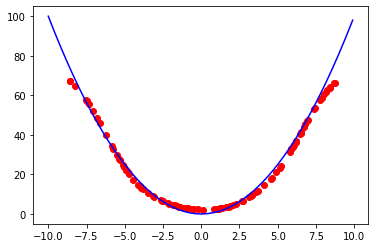

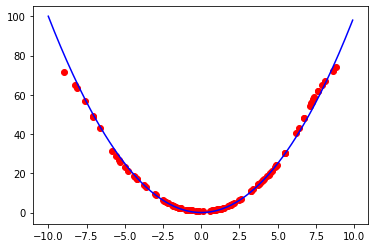

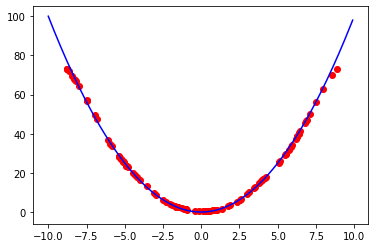

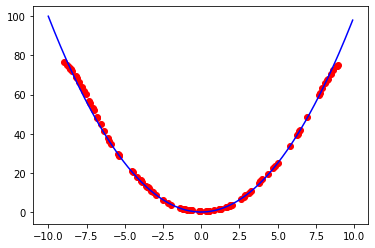

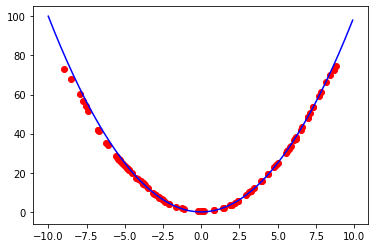

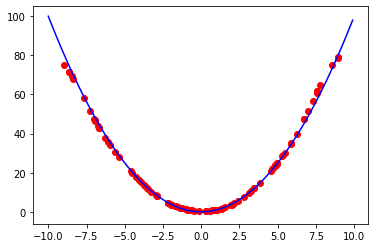

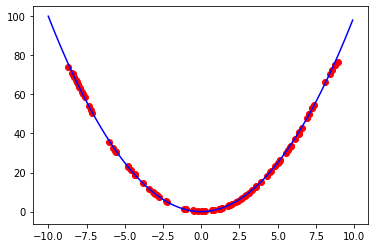

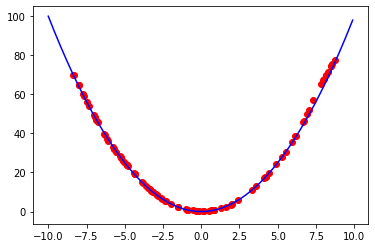

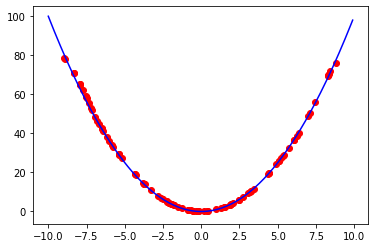

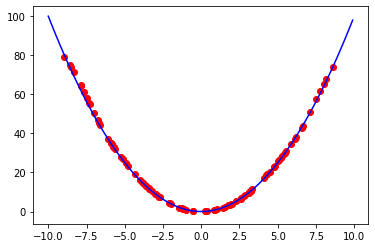

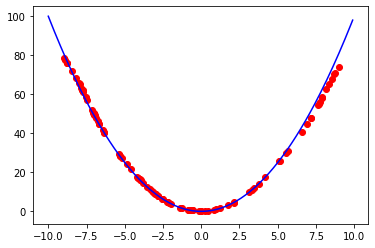

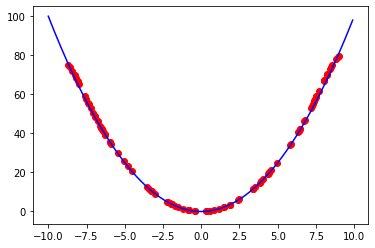

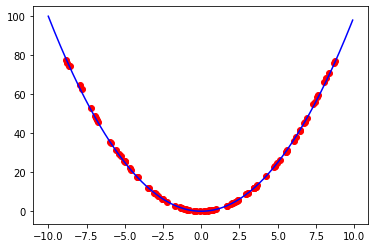

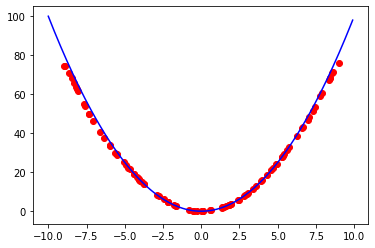

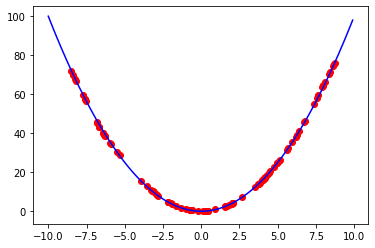

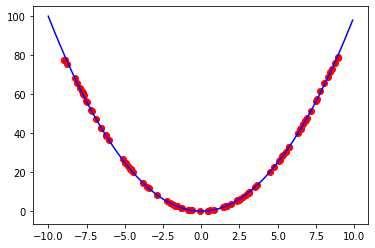

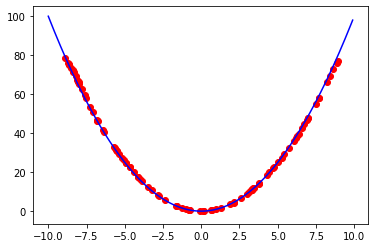

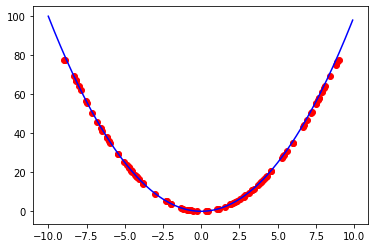

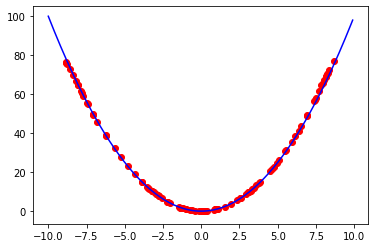

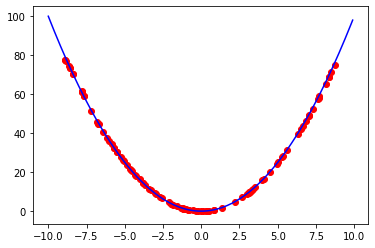

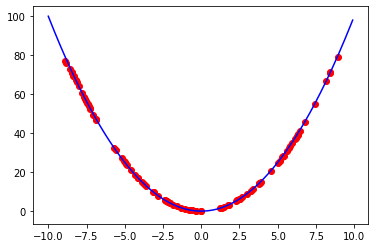

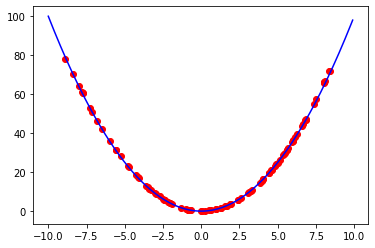

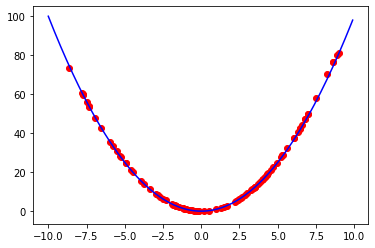

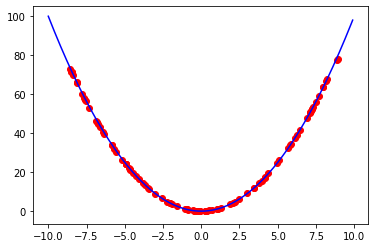

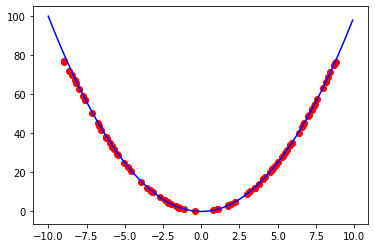

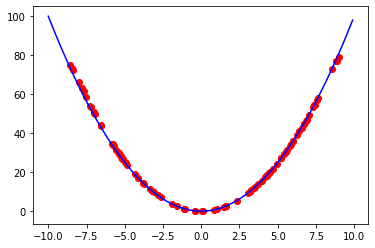

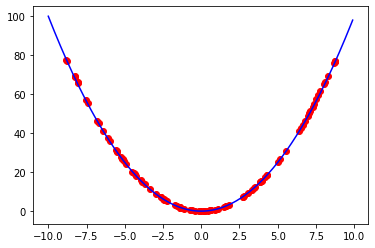

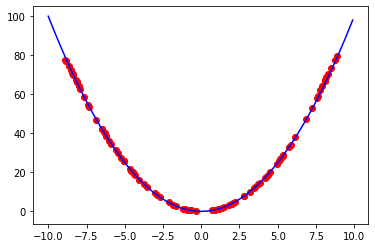

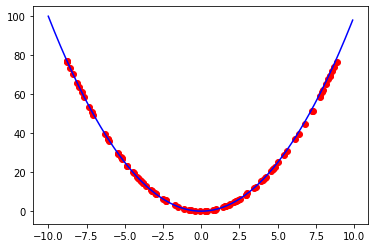

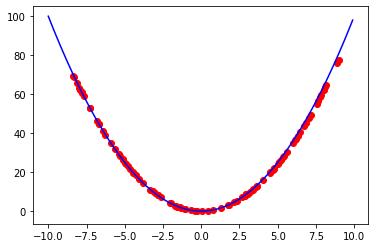

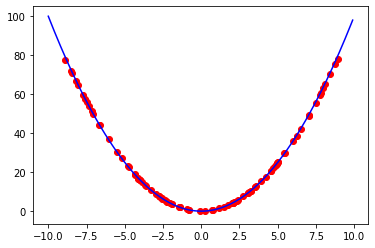

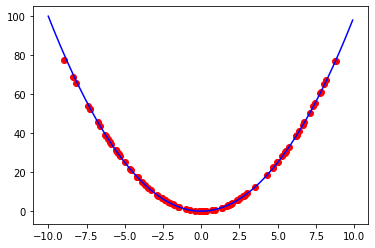

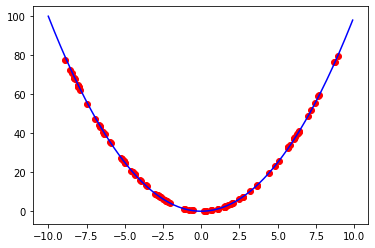

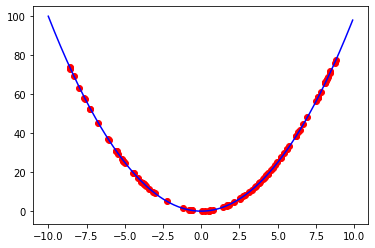

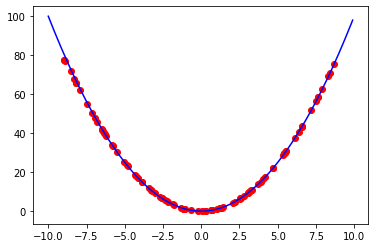

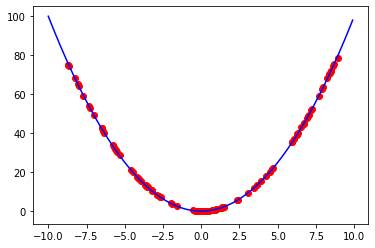

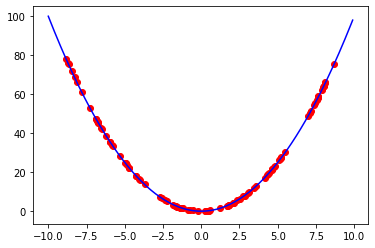

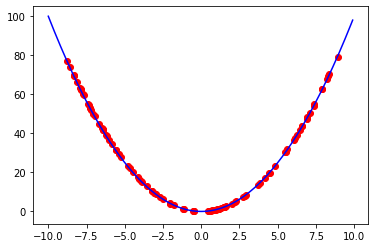

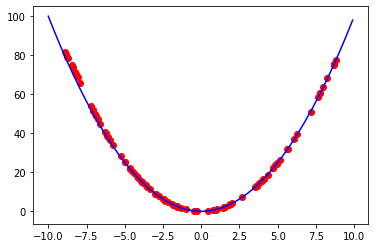

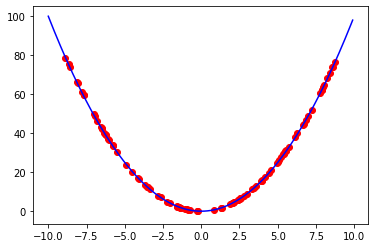

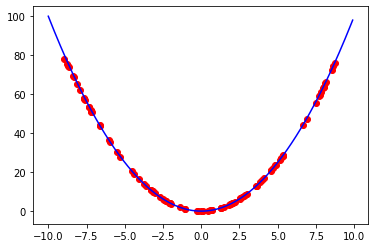

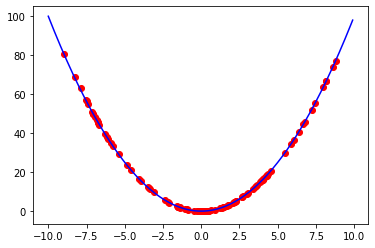

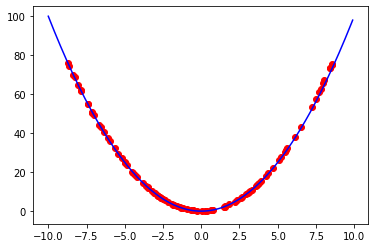

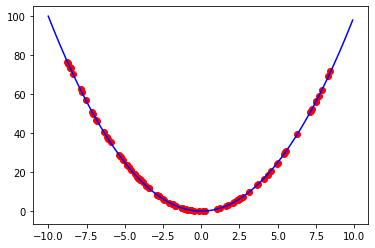

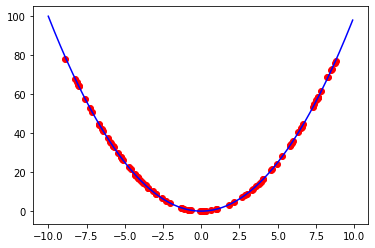

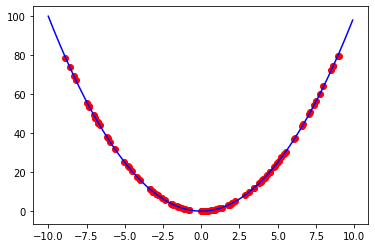

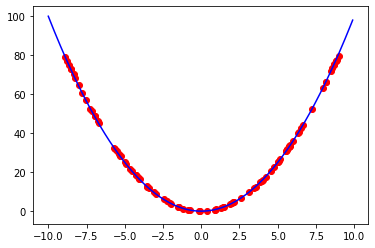

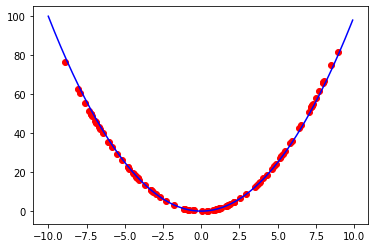

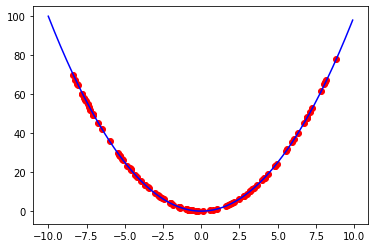

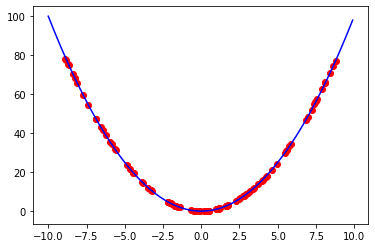

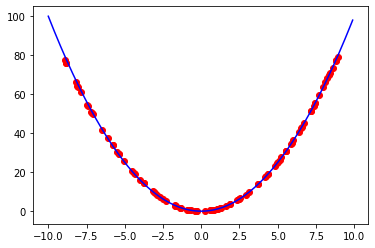

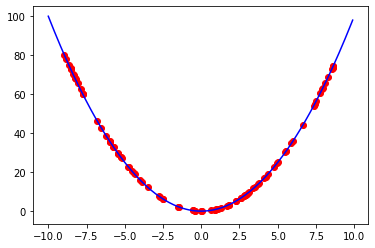

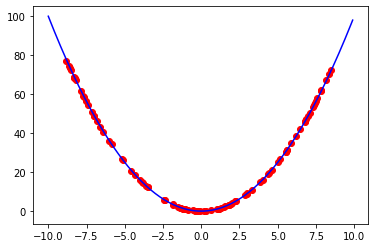

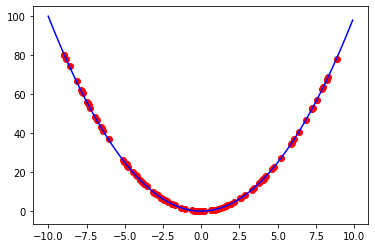

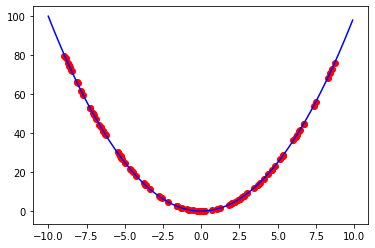

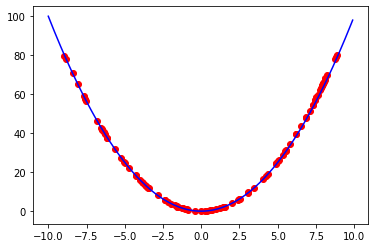

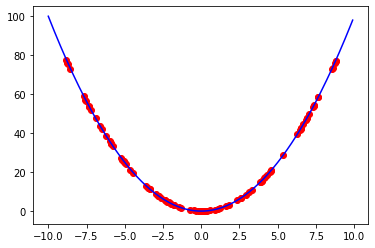

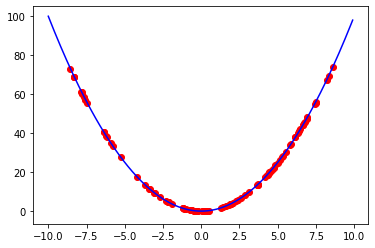

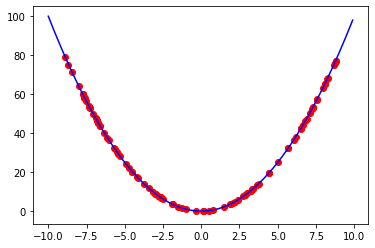

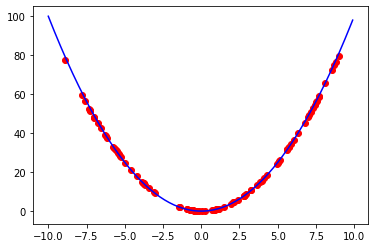

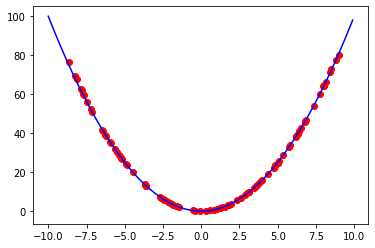

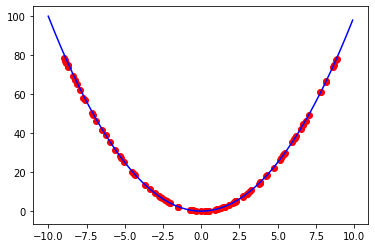

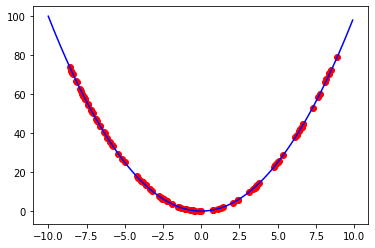

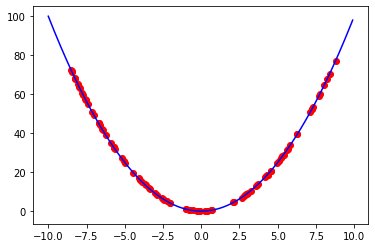

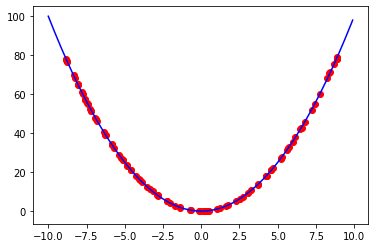

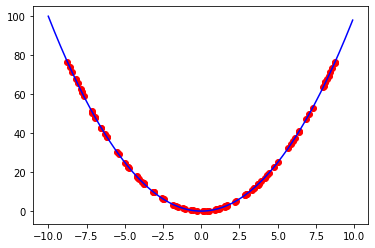

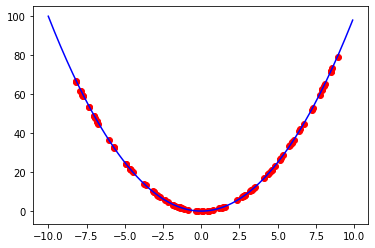

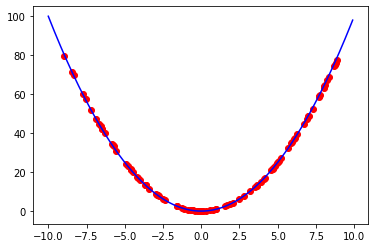

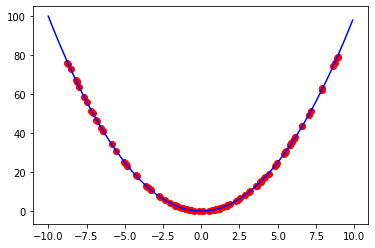

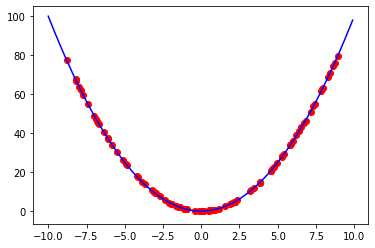

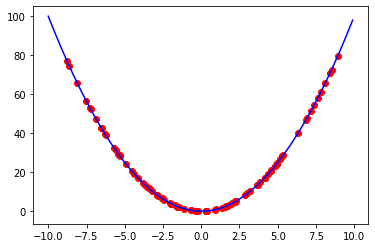

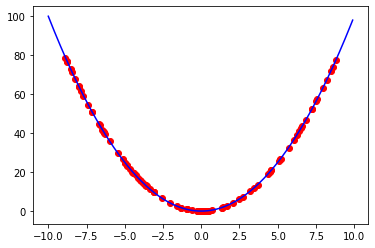

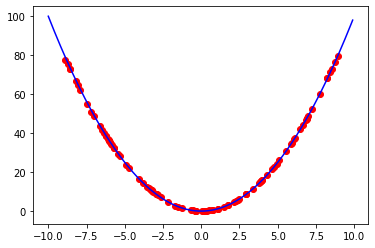

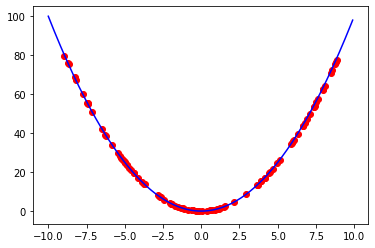

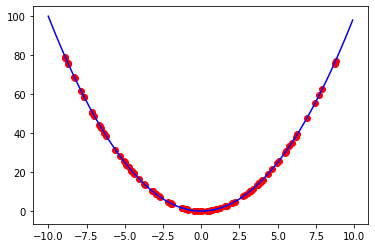

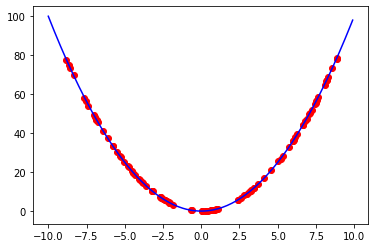

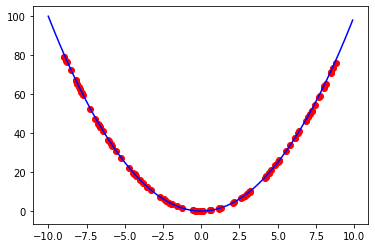

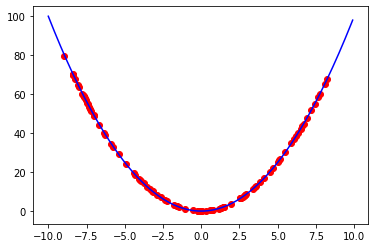

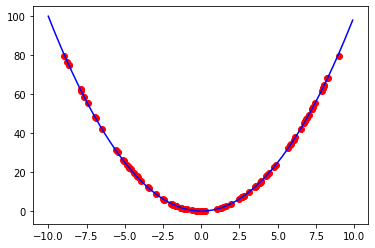

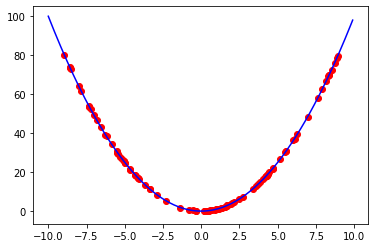

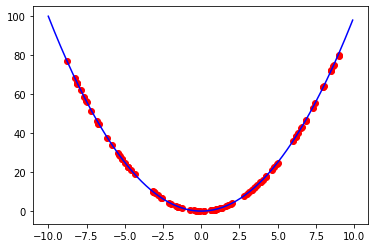

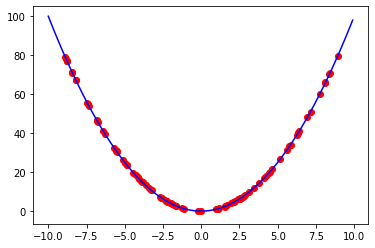

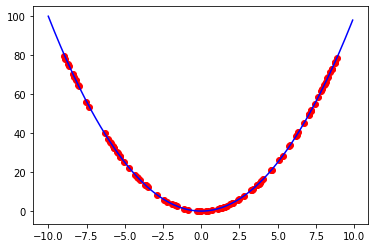

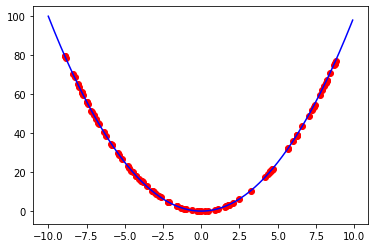

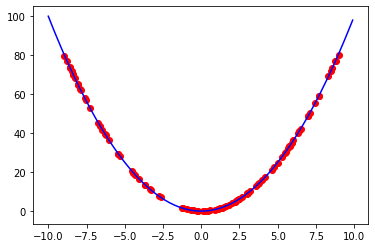

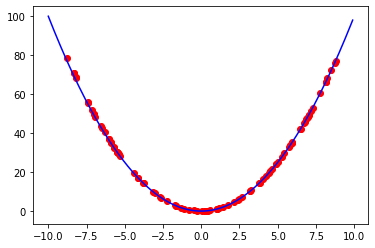

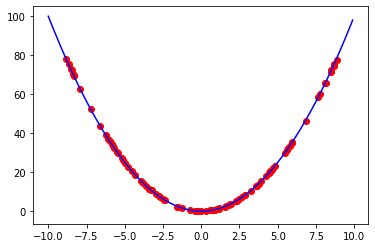

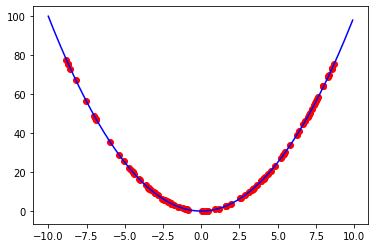

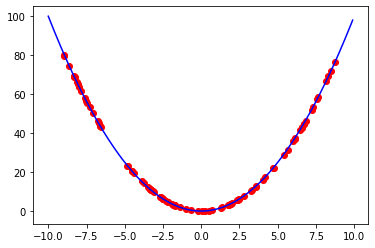

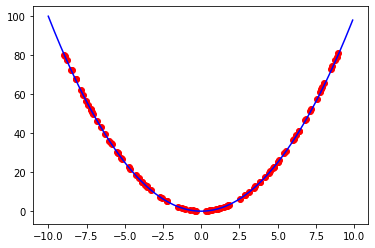

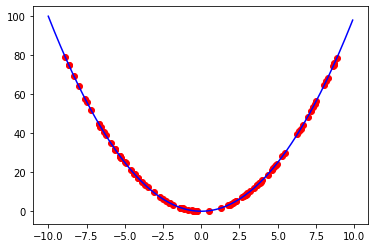

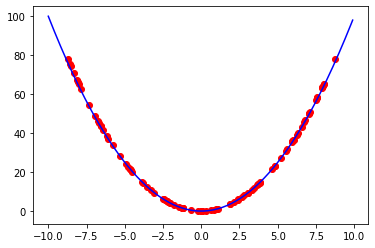

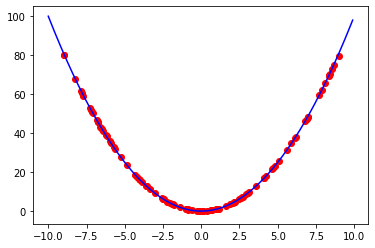

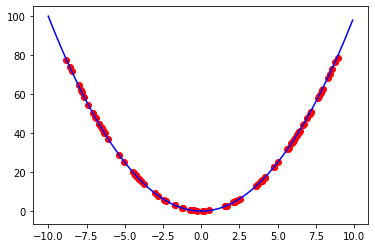

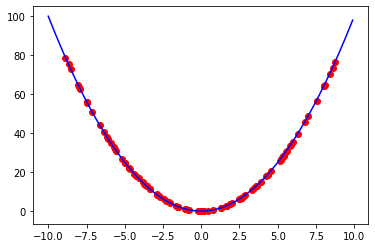

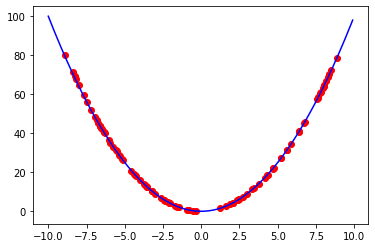

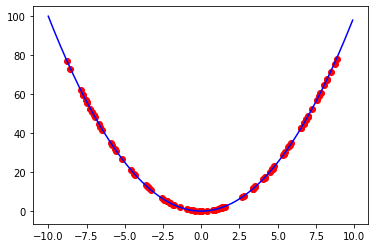

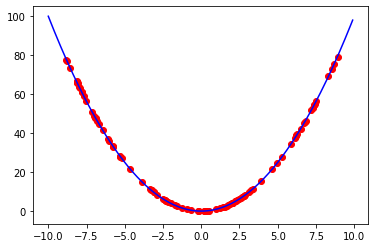

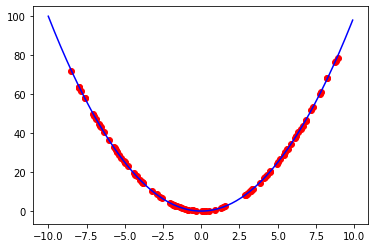

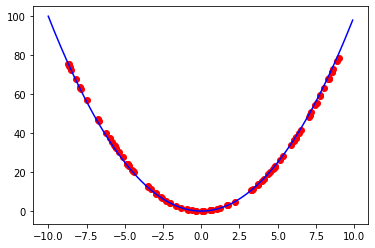

In [8]:
epoch =100
plt.ion()
for e in range(epoch):
    for i in range(100):
        Train()
    
    plt.clf()
    plt.plot(period,ApoxFunk(period),'blue')
    #rand_set =(np.random.random(set_count))*2*prange-prange+pcenter 
    rand_set = np.random.uniform(-9, 9, set_count)   # массив 
    for i in range(0, set_count-1):
        plt.scatter(rand_set[i],myNN.predict([rand_set[i]]),c='red')
    plt.pause(1)
    

In [281]:
def K(inp):
    inp +=[1]
    print(inp)

In [283]:
inp = [0.1,0.32,1.121]
in2 = [1]
in3 = inp+in2
K(inp)
print(in3)

[0.1, 0.32, 1.121, 1]
[0.1, 0.32, 1.121, 1]


TypeError: pow expected at least 2 arguments, got 1